# JUPYTER NOTEBOOK FOR HOMEWORK 2 - question 2
Using logistic regression classifier to identify faces with happy or sad expressions

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from helper import y2indicator, getBinaryfer13Data, sigmoid, sigmoid_cost, error_rate, init_weight_and_bias, \
                    init_weight_and_bias_NN, ReLU, softmax

# The Logistic regressor class

In [18]:

#Implement a logistic regression class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class LRClass(object):
    def __init__(self):
        self.W = None
        self.b = 0

    def train(self, X, Y, step_size=10e-7, epochs=1000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape
        

        #(i) Initialize the weights W to small random numbers (variance - zero); 
        #       also initialize the bias b to zero
        self.W, self.b = init_weight_and_bias(D, 1)
        regularization = 0.1

        #For the given number of epochs selected, learn the weights 
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        
        #(ii) Create a loop over the number of epochs specified. 
        for i in range(epochs):
                #(iii) Call the forward funcion to calculate P(Y|X)
                A = self.forward(X)
                #(iv) Next, learn the weights via back-propagation, by performing 
                #   gradient descent using equations (1) and (2) from the HW text
                #print(Y.shape)
                self.W -= step_size*(np.dot(X.T, (A - Y)) + (regularization*self.W))
                self.b -= step_size*(sum(A - Y))
                #(v) Using both the training and validation data, compute P(Y|X) using the 
                #       forward algo. Compute the sigmoid costs and append to array costs
                #       Check to set best_validation_error
                A_valid = self.forward(Xvalid)
                train_loss = (sigmoid_cost(Y, A)/N) + ((regularization/(2*N))*np.sum(np.dot(self.W.T, self.W)))
                valid_loss = (sigmoid_cost(Yvalid, A_valid)/len(Yvalid)) + ((regularization/(2*len(Yvalid)))*np.sum(np.dot(self.W.T, self.W)))
                train_costs.append(train_loss)
                valid_costs.append(valid_loss)
                #error = error_rate(np.round(A_valid),Yvalid)
                if valid_loss < best_validation_error:
                    best_validation_error = valid_loss
        #(vi) Print your best validation error here
        print("best_validation_error:", best_validation_error)
        
        #(vii) Display the graph of the validation cost in your final report
        plt.plot(list(range(epochs)), train_costs, label = "train loss")
        plt.plot(list(range(epochs)), valid_costs, label = "valid loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend(loc = "upper right")
        plt.show()
    
    # Implement the forward algorithm
    def forward(self, X):
        return sigmoid(np.dot(X, self.W) + self.b)
    
    # Implement the prediction algorithm, calling forward
    def predict(self, X):
        return np.round(self.forward(X))
        
    
    # Implement a method to compute accuracy or classification rate
    def score(self, X, Y):
        predict = self.predict(X)
        return np.mean(predict == Y)

best_validation_error: 0.6099523058101498


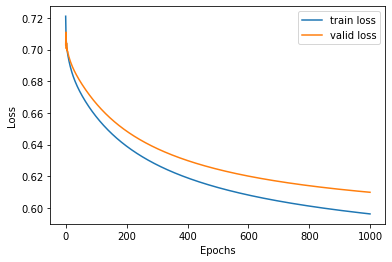

Accuracy of test set is:  0.7076666666666667


In [19]:
#Call your logistic regression class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv') 
lrObj = LRClass()
lrObj.train(X, Y, epochs = 1000)

#(viii) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
print("Accuracy of test set is: ", lrObj.score(testX, testY))
